Question 1:
Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [24]:
iris = pd.read_csv ('Iris.csv')

In [25]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
iris.describe(include='all')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
iris.drop(columns="Id",inplace=True)

In [30]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

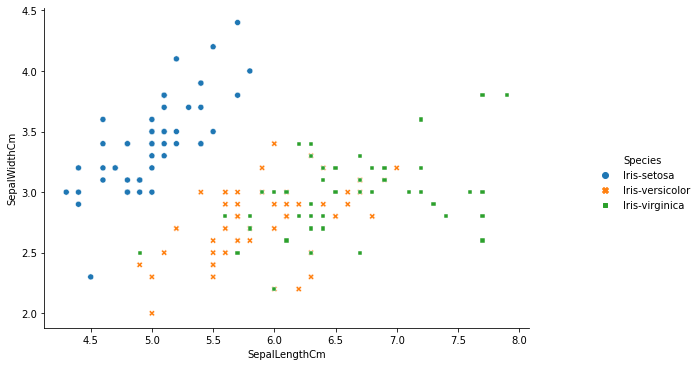

In [31]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

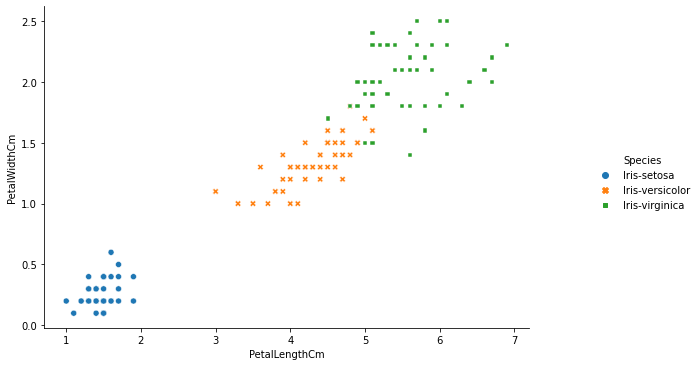

In [32]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

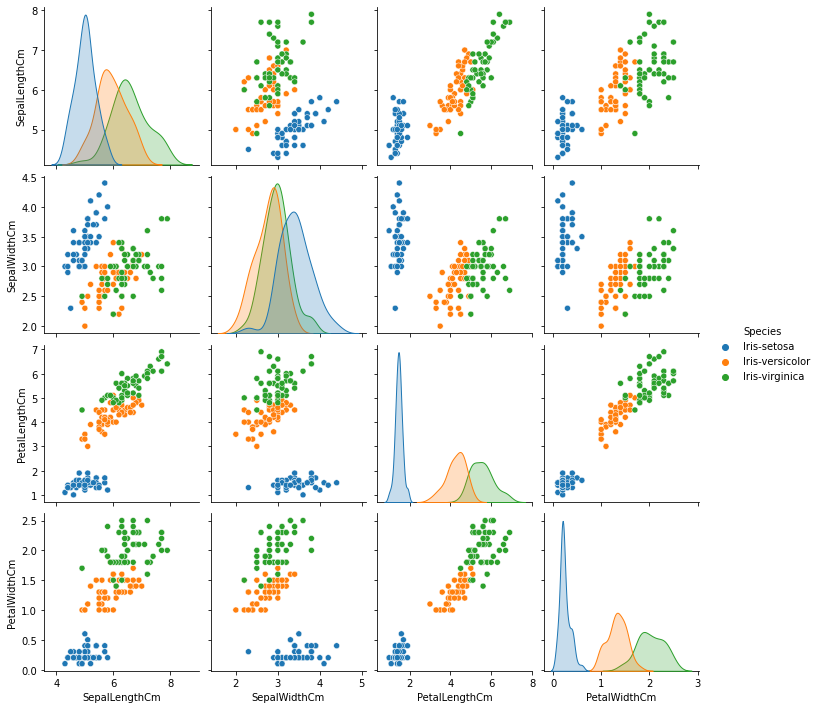

In [33]:
sns.pairplot(iris,hue="Species")
plt.show()

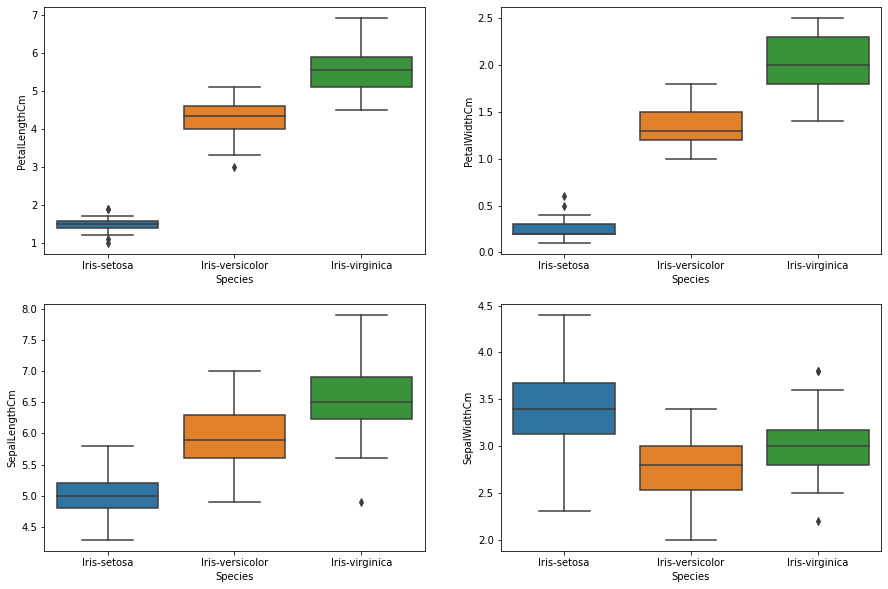

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

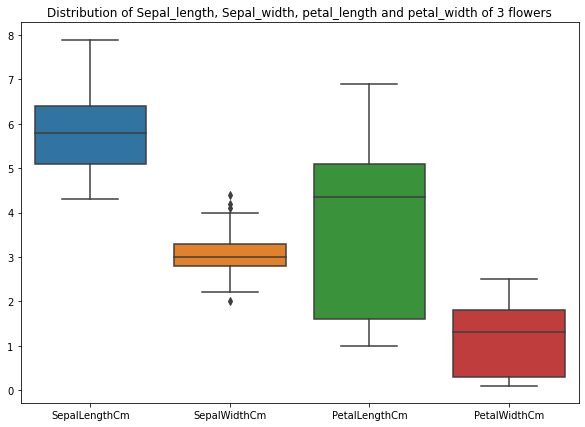

In [35]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

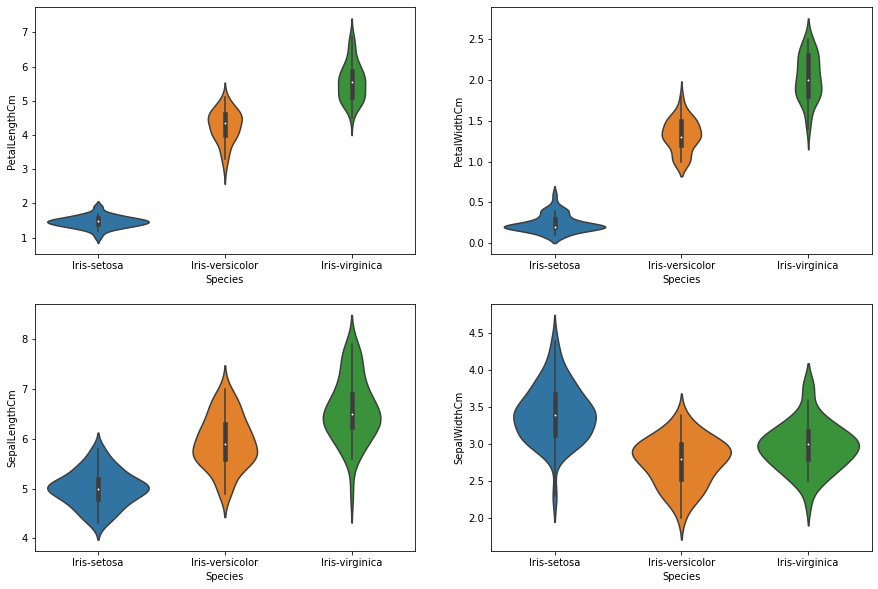

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


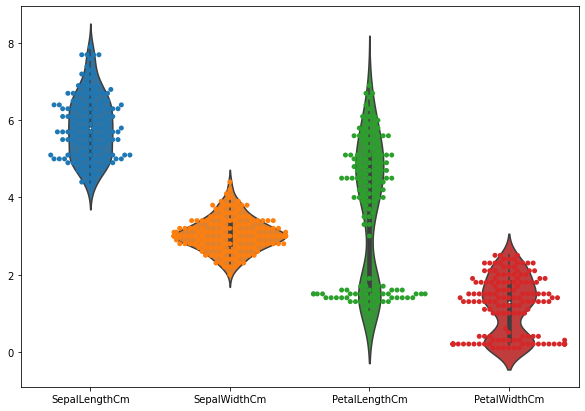

In [37]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot( data=iris)
plt.show()

In [38]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


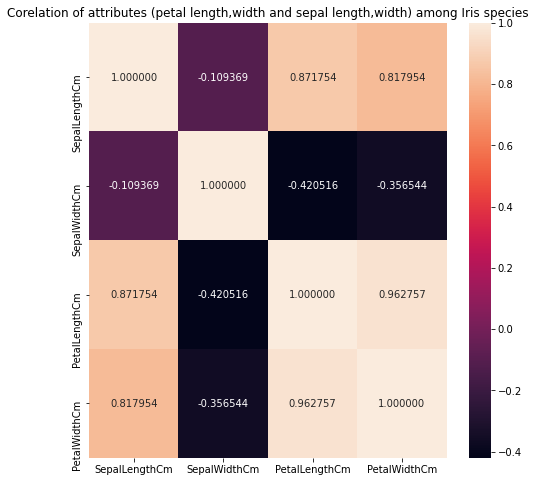

In [39]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

In [40]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [42]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [43]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.linear_model import  LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_Logistic Regression : 0.978
precision_Logistic Regression : 0.978
recall_Logistic Regression: 0.978
f1-score_Logistic Regression : 0.978


In [47]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


In [52]:
results = pd.DataFrame({

    'Model': [ 'KNN', 
              'Logistic Regression'],

    'Score': [ acc_knn,
              acc_log],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,KNN,96.19,97.78
1,Logistic Regression,98.10,97.78


In [53]:
## SOI based on comoparision we can say that we are getting samne accuracy in both models 